RAW DATA

`ID = 16675`

`NAME = OEOW08FGQ`

`TIME = 2022-07-03T17:01:38.237000`

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
from astropy.table import QTable
from matplotlib.colors import LinearSegmentedColormap  # colormapをカスタマイズする

# matplotlib フォント設定
plt.rcParams.update({'font.sans-serif': "Arial",
                     'font.family': "sans-serif",
                     'mathtext.fontset': 'custom',
                     'mathtext.rm': 'Arial',
                     'mathtext.it': 'Arial:italic',
                     'mathtext.bf': 'Arial:italic:bold'
                     })

In [2]:
def generate_cmap(colors):
    """自分で定義したカラーマップを返す"""
    values = range(len(colors))

    vmax = np.ceil(np.max(values))
    color_list = []
    for v, c in zip(values, colors):
        color_list.append((v / vmax, c))
    return LinearSegmentedColormap.from_list('custom_cmap', color_list)

cmapBLUES = generate_cmap(['#000000','#010E5E','#042AA6','#0F7CE0','#1AC7FF','#FFFFFF'])

In [42]:
sample = fits.getdata('../../data/OEOW08FGQ/oeow08fgq_raw.fits')
width = sample.shape[1]
print('WIDTH OF THE SAMPLE IMAGE IS', sample.shape[0], sample.shape[1], 'PX.')

WIDTH OF THE SAMPLE IMAGE IS 2048 2048 PX.


In [43]:
# 情報を見る (header)
data = fits.open('../../data/OEOW08FGQ/oeow08fgq_raw.fits')
print(repr(data[0].header))
data.close()

SIMPLE  =                    T / data conform to FITS standard                  
BITPIX  =                   32 / bits per data value                            
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / File may contain standard extensions           
NEXTEND =                    3 / Number of standard extensions                  
GROUPS  =                    F / image is in group format                       
DATE    = '2022-07-03'         / date this file was written (yyyy-mm-dd)        
FILENAME= 'oeow08fgq_raw.fits                     ' / name of file              
FILETYPE= 'SCI      '          / type of data found in data file                
                                                                                
TELESCOP= 'HST'                / telescope used to acquire data                 
INSTRUME= 'STIS  '             / identifier for instrument used to acquire data 
EQUINOX =               2000

In [75]:
# 情報を見る (table)
hdul = fits.open('../../data/OEOW08FGQ/oeow08fgq_raw.fits')
sci_data = hdul['SCI'].data
print(sci_data)
hdul.close()

[[  0   0   0 ...   9  37   0]
 [  3   1   0 ... 467 359   0]
 [  0   0   0 ...  42 217   0]
 ...
 [  0   0   0 ...  25   0   0]
 [  0   0   0 ...  38   0   0]
 [  0   0   0 ...  49   0   0]]


In [67]:
data_table = QTable.read('../../data/OEOW08FGQ/oeow08fgq_tag.fits')
print(data_table)

         TIME         AXIS1  AXIS2  DETAXIS1
       seconds        pixels pixels  pixels 
--------------------- ------ ------ --------
0.0063750000000000005 1822.0 1330.0   1822.0
              0.00675 1505.0 1188.0   1505.0
              0.00675 1324.0 1485.0   1324.0
             0.007125 1265.0 1016.0   1265.0
              0.00725 1944.0 1813.0   1944.0
             0.007625 1783.0  442.0   1783.0
             0.007625 1335.0 1730.0   1335.0
              0.00775 1899.0 1276.0   1899.0
              0.00775 1969.0 1387.0   1969.0
             0.008125 1509.0 1608.0   1509.0
                  ...    ...    ...      ...
          2523.205375 1688.0 1251.0   1688.0
          2523.205375   40.0  479.0     40.0
          2523.205375 1211.0 1662.0   1211.0
            2523.2055 1373.0 1268.0   1373.0
          2523.205625 1800.0 1943.0   1800.0
          2523.205625 1673.0 1678.0   1673.0
           2523.20575 1633.0 1039.0   1633.0
             2523.206 1444.0 1147.0   1444.0
          

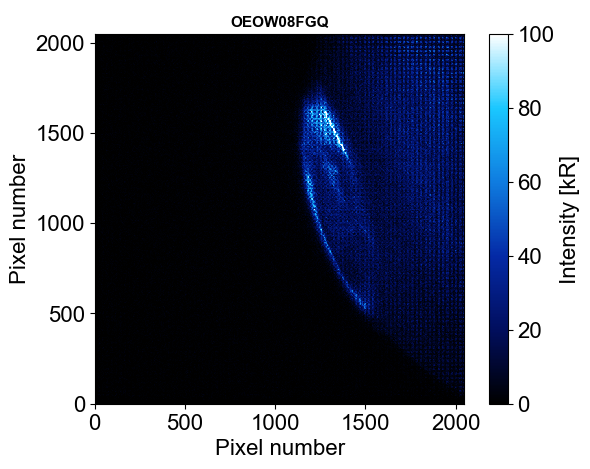

In [44]:
fig, ax = plt.subplots(dpi=100)
ax.set_aspect('equal')
ax.set_title('OEOW08FGQ', weight='bold', fontsize=11)
ax.set_xlabel('Pixel number', fontsize=16)
ax.set_ylabel('Pixel number', fontsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
cs = ax.pcolormesh(sample, vmin=None, vmax=100, cmap=cmapBLUES)
# cs = ax.contourf(sample, 200, vmin=0, vmax=1000, cmap=cmapBLUES)
pp = fig.colorbar(cs)
pp.ax.set_title(' ', fontsize=16)
pp.set_label('Intensity [kR]', fontsize=16)
pp.ax.tick_params(labelsize=16)
plt.show()